# Analysis of Kodkod backend over the 109 features set

In this note book we will explore the ProB native backend with default settings over the F109 feature set by employing decision trees and random forests.

In [1]:
%run f109_info.py

import pandas as pd
import numpy as np

data = pd.read_csv('data/2020-01-23/kodkod-f109-lto_unique.csv')
n_features = 109

data.head()

,Feature0,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,...,Feature100,Feature101,Feature102,Feature103,Feature104,Feature105,Feature106,Feature107,Feature108,Label0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Data insights

Firstly, we check how many positive and negative samples exist in the data.

In [2]:
sample_count = len(data)
positive = data[data["Label0"] == 1]
negative = data[data["Label0"] == 0]

print("We have %d samples in the dataset." % sample_count)
print("For %d of these, ProB is able to find a solution (%0.3f%%)" % (len(positive), len(positive)/sample_count))
print("For %d of these, ProB is _not_ able to find a solution (%0.3f%%)" % (len(negative), len(negative)/sample_count))

We have 172723 samples in the dataset.
For 126424 of these, ProB is able to find a solution (0.732%)
For 46299 of these, ProB is _not_ able to find a solution (0.268%)


Text(0, 0.5, '# Samples')

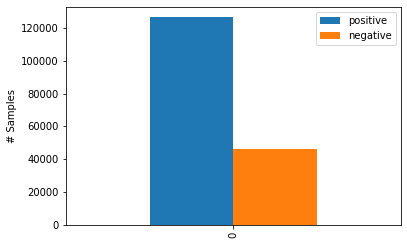

In [3]:
%matplotlib inline

class_balance = pd.DataFrame(data={"positive": [len(positive)], "negative": [len(negative)]})
class_balance_plot = class_balance.plot(kind="bar")
class_balance_plot.set_ylabel("# Samples")

Now we will inspect how often each feature is used in the data in the first place. Thus we can evaluate how much significance each evaluation over the subdomains has.

In [4]:
feature_uses = data[data > 0].count() 
rel_feature_uses = feature_uses/sample_count

fd = {}
for f in range(n_features):
    fd["Feature%d" % f] = [feature_uses[f]]
feature_data = pd.DataFrame(data=fd)
feature_data

,Feature0,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,...,Feature99,Feature100,Feature101,Feature102,Feature103,Feature104,Feature105,Feature106,Feature107,Feature108
0,103259,146983,138849,138849,138849,172626,129808,119579,137698,25585,...,441,1061,906,303,1143,484,505,129,454,54


In [5]:
# We also calculate the relative amount of feature uses.
fd = {}
for f in range(n_features):
    fd["Feature%d" % f] = [rel_feature_uses[f]]
rel_feature_data = pd.DataFrame(data=fd)
rel_feature_data

,Feature0,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,...,Feature99,Feature100,Feature101,Feature102,Feature103,Feature104,Feature105,Feature106,Feature107,Feature108
0,0.59783,0.850975,0.803883,0.803883,0.803883,0.999438,0.751539,0.692317,0.797219,0.148127,...,0.002553,0.006143,0.005245,0.001754,0.006618,0.002802,0.002924,0.000747,0.002628,0.000313


In [6]:
mean_diffs = data.groupby("Label0").mean()
mean_diffs

,Feature0,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,...,Feature99,Feature100,Feature101,Feature102,Feature103,Feature104,Feature105,Feature106,Feature107,Feature108
Label0,,,,,,,,,,,,,,,,,,,,,
0.0,2.021771,3.354037,0.593150,0.369225,0.626693,56.444129,0.331780,0.471196,0.18931,0.007390,...,0.001195,0.002575,0.004785,0.000926,0.003982,0.001188,0.001947,0.000047,0.001307,0.000258
1.0,1.712008,2.289566,0.573897,0.420759,0.655666,12.945036,-8.120015,8.789025,0.31639,0.013951,...,0.002022,0.006065,0.003384,0.000255,0.005303,0.001128,0.001183,0.000130,0.002882,0.000211


Let us list the sorted differences in mean by feature.

In [7]:
sorted_mean_diffs = ((mean_diffs.iloc[0] / mean_diffs.iloc[1])).sort_values(ascending=False)

for k in sorted_mean_diffs.keys():
    fid = int(k[7:])
    print(f109_name(fid), sorted_mean_diffs[k])

Set operations per conjunct 8.94426102389625
Boolean literals per conjunct 7.124572455278539
Relations per conjunct 7.050813865319233
forward composition ratio of rel ops 5.7867369856544695
Equality per conjunct 5.5181637705523405
Powersets per conjunct 5.361658833061185
General relations ratio of all relations 4.879249446057292
Logic ops per conjunct 4.360291323556933
Functions per conjunct 4.118581148833556
Quantifiers per conjunct 4.009189310569779
Set inclusions per conjunct 3.841617680573157
Rel ops per conjunct 3.7420894678106733
Function applications per conjunct 3.631939108445291
front insertions ratio per seq op 3.6280676179006597
Number of identifiers per conjunct 3.406842581914202
Inequality per conjunct 3.2955608997444616
Intersections per set set op 3.2586252802858193
Relational overrides ratio of rel ops 3.0463251113473553
Lambda-expression ratio over functions 2.6579195673766405
Relational inversions ratio of rel ops 2.6504702497112334
\exists ratio of all quantifiers 2.

## Training a Classifier

First, let's check the performance a decision tree or a random forest can reach on a designated train and test set.

### Prepare the training and test data

In [8]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size = 0.2)
train_x = train[train.columns[0:n_features]]
train_y = train["Label0"]

test_x = test[test.columns[0:n_features]]
test_y = test["Label0"]

In [9]:
%run printing.py

<Figure size 432x288 with 0 Axes>

### Decision Tree

In [10]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(class_weight="balanced")

tree.fit(train_x, train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [11]:
print_classifier_stats(tree, test_x, test_y)

Test accuracy: 0.904
Test balanced accuracy: 0.875
Test precision: 0.929
Test recall: 0.940
Test F1: 0.935


### Random Forest and Gini Importance

Next we will train a random forest with Gini Impurity and also calculate the respective gini importances of each feature.

In [12]:
from sklearn.ensemble import RandomForestClassifier

forest_0 = RandomForestClassifier(
    n_estimators=100, # 100 Trees.
    criterion="gini", # Using Gini index instead of "entropy"
    n_jobs=6, # Number of CPUs to use.
    bootstrap=False,
    max_features=0.7,
    random_state=124,
    class_weight="balanced")

forest_0.fit(train_x, train_y)


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features=0.7,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=6,
                       oob_score=False, random_state=124, verbose=0,
                       warm_start=False)

In [13]:
print_classifier_stats(forest_0, test_x, test_y)


Test accuracy: 0.926
Test balanced accuracy: 0.906
Test precision: 0.952
Test recall: 0.948
Test F1: 0.950


## Training on the full data set

For the feature evaluation it might be more of interest to not exclude the test set from the training data. We do not aim for a good predictor but instead for an analysis over the whole dataset.

In [14]:
X = data[data.columns[0:n_features]]
Y = data["Label0"]

forest = RandomForestClassifier(
    n_estimators=50, # 50 Trees.
    criterion="gini", # Using Gini index instead of "entropy"
    n_jobs=6, # Number of CPUs to use.
    bootstrap=False,
    max_features=0.7,
    random_state=123,
    class_weight="balanced")

forest.fit(X, Y)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features=0.7,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=6,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

In [15]:
print_classifier_stats(forest, X, Y)

Test accuracy: 0.979
Test balanced accuracy: 0.964
Test precision: 0.971
Test recall: 1.000
Test F1: 0.985


List features by importance

In [16]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

In [17]:
# Print the feature ranking
print("Feature ranking:")

cat_count_top50 = {}
cat_count_top100 = {}
for f in range(100):
    cat = f109_category(indices[f])
    cat_count_top100[cat] = cat_count_top100.get(cat, 0) + 1
    if f < 50:
        cat_count_top50[cat] = cat_count_top50.get(cat, 0) + 1
    print("%3d. feature %3d (importance: %1.6f, rel. usage: %1.6f):  [%-11s]  %s" % (f + 1, indices[f], importances[indices[f]], rel_feature_uses[indices[f]], cat, f109_name(indices[f])))

Feature ranking:
  1. feature  80 (importance: 0.145793, rel. usage: 0.479328):  [Functions  ]  Function applications per conjunct
  2. feature  23 (importance: 0.046781, rel. usage: 0.472676):  [Identifiers]  Function var ratio of identifiers
  3. feature  74 (importance: 0.036300, rel. usage: 0.117541):  [Relations  ]  forward composition ratio of rel ops
  4. feature  42 (importance: 0.031909, rel. usage: 0.342896):  [Set theory ]  Set operations per conjunct
  5. feature   6 (importance: 0.027650, rel. usage: 0.751539):  [Logic      ]  Conjunctions per logic ops
  6. feature   7 (importance: 0.026906, rel. usage: 0.692317):  [Logic      ]  Disjunctions per logic ops
  7. feature   8 (importance: 0.024424, rel. usage: 0.797219):  [Logic      ]  Implications per logic ops
  8. feature  58 (importance: 0.024329, rel. usage: 0.441308):  [Relations  ]  avg. power set nesting depth
  9. feature  18 (importance: 0.024317, rel. usage: 0.999635):  [Identifiers]  Number of identifiers per co

How many of the features of each category made it to the top 100?

In [18]:
cat_count_total = {}
for f in range(n_features):
    cat = f109_category(f)
    cat_count_total[cat] = cat_count_total.get(cat, 0) + 1

### Category count in Top 100

In [19]:
for cat, count in cat_count_total.items():
    top100 = cat_count_top100.get(cat, 0)
    print("%-11s: %2d/%2d, %.3f%%" % (cat, top100, count, top100/count))

Logic      : 11/11, 1.000%
Quantifiers:  4/ 4, 1.000%
Equality   :  2/ 2, 1.000%
Identifiers: 13/13, 1.000%
Arithmetic :  9/10, 0.900%
Set theory : 17/18, 0.944%
Relations  : 18/20, 0.900%
Functions  : 11/11, 1.000%
Sequences  : 14/17, 0.824%
Closure    :  1/ 3, 0.333%


### Category count in Top 50

In [20]:
for cat, count in cat_count_total.items():
    top50 = cat_count_top50.get(cat, 0)
    print("%-11s: %2d/%2d, %.3f%%" % (cat, top50, count, top50/count))

Logic      : 10/11, 0.909%
Quantifiers:  2/ 4, 0.500%
Equality   :  2/ 2, 1.000%
Identifiers: 11/13, 0.846%
Arithmetic :  4/10, 0.400%
Set theory :  8/18, 0.444%
Relations  :  8/20, 0.400%
Functions  :  4/11, 0.364%
Sequences  :  1/17, 0.059%
Closure    :  0/ 3, 0.000%


### Category counts Top 50 vs. Top 100

In [21]:
print("------------ %-5s %-5s Decline" % ("T100", "T50"))
for cat, count in cat_count_total.items():
    top50 = cat_count_top50.get(cat, 0)
    top100 = cat_count_top100.get(cat, 0)
    print("%-11s: %.3f %.3f %.3f" % (cat, top100/count, top50/count, ((top100-top50)/top100) if top100>0 else 0))


------------ T100  T50   Decline
Logic      : 1.000 0.909 0.091
Quantifiers: 1.000 0.500 0.500
Equality   : 1.000 1.000 0.000
Identifiers: 1.000 0.846 0.154
Arithmetic : 0.900 0.400 0.556
Set theory : 0.944 0.444 0.529
Relations  : 0.900 0.400 0.556
Functions  : 1.000 0.364 0.636
Sequences  : 0.824 0.059 0.929
Closure    : 0.333 0.000 1.000


## Taking a look at permutation importance

While the Gini index captures the average gain of splitting on each feature in their respective position in the tree, the permutation importance is more robust against variable codependencies.

In [22]:
from sklearn.inspection import permutation_importance

perm_importances = permutation_importance(forest, X, Y, scoring='balanced_accuracy', n_repeats=5, n_jobs=1, random_state=1234)
perm_indices = perm_importances.importances_mean.argsort()[::-1]

In [23]:
# Print the feature ranking
print("Feature ranking:")

pcat_count_top50 = {}
pcat_count_top100 = {}
for f in range(100):
    cat = f109_category(perm_indices[f])
    pcat_count_top100[cat] = pcat_count_top100.get(cat, 0) + 1
    if f < 50:
        pcat_count_top50[cat] = pcat_count_top50.get(cat, 0) + 1
    print("%3d. feature %3d (importance: %1.6f, rel. usage: %1.6f):  [%-11s]  %s" % (f + 1, perm_indices[f], perm_importances.importances_mean[perm_indices[f]], rel_feature_uses[perm_indices[f]], cat, f109_name(perm_indices[f])))

Feature ranking:
  1. feature  80 (importance: 0.154543, rel. usage: 0.479328):  [Functions  ]  Function applications per conjunct
  2. feature   8 (importance: 0.039193, rel. usage: 0.797219):  [Logic      ]  Implications per logic ops
  3. feature  12 (importance: 0.034015, rel. usage: 0.471541):  [Quantifiers]  Quantifiers per conjunct
  4. feature  55 (importance: 0.025178, rel. usage: 0.441308):  [Set theory ]  Powersets per conjunct
  5. feature   6 (importance: 0.023195, rel. usage: 0.751539):  [Logic      ]  Conjunctions per logic ops
  6. feature  82 (importance: 0.022805, rel. usage: 0.457727):  [Functions  ]  General, total function ratio over functions
  7. feature  67 (importance: 0.017552, rel. usage: 0.153002):  [Relations  ]  Relational overrides ratio of rel ops
  8. feature  18 (importance: 0.017419, rel. usage: 0.999635):  [Identifiers]  Number of identifiers per conjunct
  9. feature  66 (importance: 0.015934, rel. usage: 0.239956):  [Relations  ]  Relational invers

In [24]:
print("------------ %-5s %-5s Decline" % ("T100", "T50"))
for cat, count in cat_count_total.items():
    top50 = pcat_count_top50.get(cat, 0)
    top100 = pcat_count_top100.get(cat, 0)
    print("%-11s: %.3f %.3f %.3f" % (cat, top100/count, top50/count, ((top100-top50)/top100) if top100>0 else 0))


------------ T100  T50   Decline
Logic      : 1.000 0.727 0.273
Quantifiers: 1.000 0.250 0.750
Equality   : 1.000 1.000 0.000
Identifiers: 1.000 0.846 0.154
Arithmetic : 1.000 0.400 0.600
Set theory : 0.944 0.444 0.529
Relations  : 0.850 0.500 0.412
Functions  : 1.000 0.364 0.636
Sequences  : 0.765 0.118 0.846
Closure    : 0.667 0.000 1.000


## Top 50/100 comparison between Gini Importance and Permutation Importance

In [25]:
print(".             Gini         Permutation")
print(".             %-5s %-5s  %-5s %-5s" % ("T100", "T50", "T100", "T50"))
for cat, count in cat_count_total.items():
    top50 = cat_count_top50.get(cat, 0)
    top100 = cat_count_top100.get(cat, 0)
    ptop50 = pcat_count_top50.get(cat, 0)
    ptop100 = pcat_count_top100.get(cat, 0)
    print("%-11s:  %.3f %.3f  %.3f %.3f" % (cat, top100/count, top50/count, ptop100/count, ptop50/count))


.             Gini         Permutation
.             T100  T50    T100  T50  
Logic      :  1.000 0.909  1.000 0.727
Quantifiers:  1.000 0.500  1.000 0.250
Equality   :  1.000 1.000  1.000 1.000
Identifiers:  1.000 0.846  1.000 0.846
Arithmetic :  0.900 0.400  1.000 0.400
Set theory :  0.944 0.444  0.944 0.444
Relations  :  0.900 0.400  0.850 0.500
Functions  :  1.000 0.364  1.000 0.364
Sequences  :  0.824 0.059  0.765 0.118
Closure    :  0.333 0.000  0.667 0.000


## Taking a look at the individual decision trees

In [26]:
%run feature_stats.py

def calc_feature_stats(feature_ids):
    """Returns a dictionary over the given feature ids as keys.
    For each feature, another dictionary with the following structure is returned:
        {'rank-gini': rank_gini_importance, 'rank-permutation': rank_permutation_importance,
         'tendency': tendency,
         'thresholds': {'list': thresholds,
                        'avg': avg_threshold,
                        'median': median_threshold},
         'num_lower_below_threshold': num_left_lower,
         'num_lower_above_threshold': num_right_lower}
    The entry might be an empty dictionary if the corresponding feature was not used.
    """
    stats = {}
    for fid in feature_ids:
        rank_gini = np.argwhere(indices == fid)[0][0]+1
        rank_perm = np.argwhere(perm_indices == fid)[0][0]+1
        thresholds = []
        num_left_lower = 0
        num_right_lower = 0
        for tinfo in ftree_infos:
            split_info = tinfo['splits'][fid]
            if split_info == {}: continue # Feature not used in this tree.
            thresholds.append(split_info['threshold'])
            if split_info['unknown_rate'] > split_info['unknown_rate_left']:
                num_left_lower += 1
            else:
                num_right_lower += 1
        thresholds.sort()
        if (len(thresholds) == 0):
            stats[fid] = {}
            continue
        avg_threshold = sum(thresholds)/len(ftree_infos)
        med_threshold = thresholds[len(thresholds)//2]
        tendency = num_right_lower - num_left_lower
        stats[fid] = {'rank-gini': rank_gini, 'rank-permutation': rank_perm,
                      'tendency': tendency, 'thresholds': {'list': thresholds, 'avg': avg_threshold, 'median': med_threshold},
                      'num_lower_below_threshold': num_left_lower, 'num_lower_above_threshold': num_right_lower}
    return stats


def print_feature_stats(feature_stats):
    for fid in sorted(feature_stats.keys()):
        stats = feature_stats.get(fid)
        if stats == {}:
            print(f109_name(fid))
            print("  feature is not used.")
            continue
        print(f109_name(fid))
        print("  - Gini rank no.", stats['rank-gini'], "  Perm. rank no.", stats['rank-permutation'], "-")
        print("  avg threshold: %.3f (min %.3f, max %.3f, median %.3f)" % (stats['thresholds']['avg'], stats['thresholds']['list'][0], stats['thresholds']['list'][-1], stats['thresholds']['median']))
        tendency = stats['tendency']
        num_left_lower = stats['num_lower_below_threshold']
        num_right_lower = stats['num_lower_above_threshold']
        print("  %.2f%% of trees observe higher solvability if below threshold, %.2f%% above" % (100*num_left_lower/len(ftree_infos), 100*num_right_lower/len(ftree_infos)))
        print("  tendency of %s values for more solvable constraints (tendency value: %d)" % ("higher" if tendency > 0 else "lower", tendency))


def print_feature_group_stats(features, category_name):
    print("#", category_name)
    fs = calc_feature_stats(features)
    tendencies = [fs[s]['tendency'] for s in fs.keys() if fs[s] != {}]
    print("  Average tendency:", sum(tendencies)/len(tendencies))
    print_feature_stats(fs)



In [27]:
forest_trees = forest.estimators_

ftree_infos = []

for tree in forest_trees:
    ftree_infos.append(gather_tree_info(tree))

For the top 50 features, what are the thresholds and where do they lead?
The tendency values range from -50 to 50 (including) and show how many trees in the forest lead to an answer if the value is below (-50) or above (+50) their respective threshold.

In [28]:
for fid in indices[0:50]:
    print("->", f109_name(fid))
    thresholds = []
    num_left_lower = 0
    num_right_lower = 0
    for tinfo in ftree_infos:
        split_info = tinfo['splits'][fid]
        if split_info == {}: continue # Feature not used in this tree.
        thresholds.append(split_info['threshold'])
        if split_info['unknown_rate'] > split_info['unknown_rate_left']:
            num_left_lower += 1
        else:
            num_right_lower += 1
    thresholds.sort()
    avg_threshold = sum(thresholds)/len(ftree_infos)
    med_threshold = thresholds[len(ftree_infos)//2]
    print("  avg threshold: %.3f (min %.3f, max %.3f, median %.3f)" % (avg_threshold, thresholds[0], thresholds[-1], med_threshold))
    print("  %.2f%% of trees observe higher solvability if below threshold, %.2f%% above" % (100*num_left_lower/len(ftree_infos), 100*num_right_lower/len(ftree_infos)))
    tendency = num_right_lower - num_left_lower
    print("  tendency of %s values for more solvable constraints (tendency value: %d)" % ("higher" if tendency > 0 else "lower", tendency))


-> Function applications per conjunct
  avg threshold: 0.419 (min 0.090, max 9.000, median 0.116)
  52.00% of trees observe higher solvability if below threshold, 48.00% above
  tendency of lower values for more solvable constraints (tendency value: -2)
-> Function var ratio of identifiers
  avg threshold: 0.033 (min 0.009, max 0.155, median 0.024)
  36.00% of trees observe higher solvability if below threshold, 64.00% above
  tendency of higher values for more solvable constraints (tendency value: 14)
-> forward composition ratio of rel ops
  avg threshold: 0.426 (min 0.155, max 1.000, median 0.321)
  56.00% of trees observe higher solvability if below threshold, 44.00% above
  tendency of lower values for more solvable constraints (tendency value: -6)
-> Set operations per conjunct
  avg threshold: 0.779 (min 0.017, max 6.000, median 0.500)
  12.00% of trees observe higher solvability if below threshold, 88.00% above
  tendency of higher values for more solvable constraints (tendency

We see that certain features, while having high relevancy for classification, display a tendency around 0. 
But what does that mean regarding their relevancy? Naively it look as the feature is not a language-subset in which the backend performs worse but rather that unknown-results are related to the rest of the predicate. Depending on the random data subset the respective tree was trained on, the threshold might split into better or worse samples.

### Display of tendencies per category

In [29]:
print_feature_group_stats(range(12), "Logic")

# Logic
  Average tendency: 6.333333333333333
Number of conjuncts (log2)
  - Gini rank no. 36   Perm. rank no. 89 -
  avg threshold: 3.473 (min 0.500, max 7.285, median 3.857)
  18.00% of trees observe higher solvability if below threshold, 82.00% above
  tendency of higher values for more solvable constraints (tendency value: 32)
Max conjunct depth per conjunct
  - Gini rank no. 16   Perm. rank no. 14 -
  avg threshold: 1.772 (min 0.500, max 4.978, median 1.829)
  34.00% of trees observe higher solvability if below threshold, 66.00% above
  tendency of higher values for more solvable constraints (tendency value: 16)
number of negations per conjunct
  - Gini rank no. 33   Perm. rank no. 43 -
  avg threshold: 0.665 (min 0.011, max 3.500, median 0.417)
  46.00% of trees observe higher solvability if below threshold, 54.00% above
  tendency of higher values for more solvable constraints (tendency value: 4)
max negation depth per conjunct
  - Gini rank no. 47   Perm. rank no. 52 -
  avg th

In [30]:
print_feature_group_stats(range(12, 16), "Quantifiers") 

# Quantifiers
  Average tendency: 11.5
Quantifiers per conjunct
  - Gini rank no. 23   Perm. rank no. 3 -
  avg threshold: 0.093 (min 0.027, max 0.775, median 0.031)
  14.00% of trees observe higher solvability if below threshold, 86.00% above
  tendency of higher values for more solvable constraints (tendency value: 36)
\forall ratio of all quantifiers
  - Gini rank no. 62   Perm. rank no. 63 -
  avg threshold: 0.599 (min 0.250, max 1.000, median 0.500)
  58.00% of trees observe higher solvability if below threshold, 42.00% above
  tendency of lower values for more solvable constraints (tendency value: -8)
\exists ratio of all quantifiers
  - Gini rank no. 28   Perm. rank no. 84 -
  avg threshold: 0.601 (min 0.100, max 1.000, median 0.500)
  42.00% of trees observe higher solvability if below threshold, 58.00% above
  tendency of higher values for more solvable constraints (tendency value: 8)
average nesting depth of quantifiers
  - Gini rank no. 41   Perm. rank no. 21 -
  avg thresho

In [31]:
print_feature_group_stats(range(16, 18), "Equality") 

# Equality
  Average tendency: 23.0
Equality per conjunct
  - Gini rank no. 11   Perm. rank no. 24 -
  avg threshold: 0.815 (min 0.007, max 12.500, median 0.500)
  8.00% of trees observe higher solvability if below threshold, 92.00% above
  tendency of higher values for more solvable constraints (tendency value: 42)
Inequality per conjunct
  - Gini rank no. 19   Perm. rank no. 13 -
  avg threshold: 0.762 (min 0.022, max 9.500, median 0.500)
  46.00% of trees observe higher solvability if below threshold, 54.00% above
  tendency of higher values for more solvable constraints (tendency value: 4)


In [32]:
print_feature_group_stats(range(18, 31), "Identifiers") 

# Identifiers
  Average tendency: 6.615384615384615
Number of identifiers per conjunct
  - Gini rank no. 9   Perm. rank no. 8 -
  avg threshold: 2.448 (min 0.017, max 10.167, median 1.044)
  32.00% of trees observe higher solvability if below threshold, 68.00% above
  tendency of higher values for more solvable constraints (tendency value: 18)
Integer var ratio of identifiers
  - Gini rank no. 29   Perm. rank no. 31 -
  avg threshold: 0.340 (min 0.016, max 1.000, median 0.300)
  28.00% of trees observe higher solvability if below threshold, 72.00% above
  tendency of higher values for more solvable constraints (tendency value: 22)
Boolean var ratio of identifiers
  - Gini rank no. 53   Perm. rank no. 54 -
  avg threshold: 0.340 (min 0.013, max 1.000, median 0.250)
  84.00% of trees observe higher solvability if below threshold, 16.00% above
  tendency of lower values for more solvable constraints (tendency value: -34)
Set var ratio of identifiers
  - Gini rank no. 12   Perm. rank no. 1

In [33]:
print_feature_group_stats(range(31, 41), "Arithmetic") 

# Arithmetic
  Average tendency: -8.8
Arithmetic ops per conjunct
  - Gini rank no. 25   Perm. rank no. 36 -
  avg threshold: 1.320 (min 0.019, max 8.750, median 0.984)
  42.00% of trees observe higher solvability if below threshold, 58.00% above
  tendency of higher values for more solvable constraints (tendency value: 8)
Addition ratio of arithmetic ops
  - Gini rank no. 51   Perm. rank no. 50 -
  avg threshold: 0.538 (min 0.071, max 1.000, median 0.500)
  40.00% of trees observe higher solvability if below threshold, 60.00% above
  tendency of higher values for more solvable constraints (tendency value: 10)
Multiplication ratio of arithmetic ops
  - Gini rank no. 46   Perm. rank no. 33 -
  avg threshold: 0.607 (min 0.500, max 1.000, median 0.500)
  76.00% of trees observe higher solvability if below threshold, 24.00% above
  tendency of lower values for more solvable constraints (tendency value: -26)
Division ratio of arithmetic ops
  - Gini rank no. 64   Perm. rank no. 53 -
  avg t

In [34]:
print_feature_group_stats(range(41, 59), "Set theory") 

# Set theory
  Average tendency: 9.058823529411764
Set inclusions per conjunct
  - Gini rank no. 22   Perm. rank no. 15 -
  avg threshold: 1.500 (min 0.061, max 12.500, median 0.659)
  20.00% of trees observe higher solvability if below threshold, 80.00% above
  tendency of higher values for more solvable constraints (tendency value: 30)
Set operations per conjunct
  - Gini rank no. 4   Perm. rank no. 39 -
  avg threshold: 0.779 (min 0.017, max 6.000, median 0.500)
  12.00% of trees observe higher solvability if below threshold, 88.00% above
  tendency of higher values for more solvable constraints (tendency value: 38)
Set comprehensions per conjunct
  - Gini rank no. 65   Perm. rank no. 58 -
  avg threshold: 0.531 (min 0.015, max 3.000, median 0.250)
  76.00% of trees observe higher solvability if below threshold, 24.00% above
  tendency of lower values for more solvable constraints (tendency value: -26)
Set memberships ratio of set inclusion ops
  - Gini rank no. 20   Perm. rank no. 

In [35]:
print_feature_group_stats(range(59, 79), "Relations") 

# Relations
  Average tendency: -2.2
Relations per conjunct
  - Gini rank no. 60   Perm. rank no. 45 -
  avg threshold: 0.703 (min 0.045, max 2.500, median 0.708)
  68.00% of trees observe higher solvability if below threshold, 32.00% above
  tendency of lower values for more solvable constraints (tendency value: -18)
Rel ops per conjunct
  - Gini rank no. 34   Perm. rank no. 32 -
  avg threshold: 1.154 (min 0.019, max 8.000, median 0.578)
  16.00% of trees observe higher solvability if below threshold, 84.00% above
  tendency of higher values for more solvable constraints (tendency value: 34)
General relations ratio of all relations
  - Gini rank no. 52   Perm. rank no. 70 -
  avg threshold: 0.670 (min 0.500, max 1.000, median 0.500)
  62.00% of trees observe higher solvability if below threshold, 38.00% above
  tendency of lower values for more solvable constraints (tendency value: -12)
Total relations ratio of all relations
  - Gini rank no. 103   Perm. rank no. 100 -
  avg threshol

In [36]:
print_feature_group_stats(range(79, 90), "Functions") 

# Functions
  Average tendency: 5.2727272727272725
Functions per conjunct
  - Gini rank no. 17   Perm. rank no. 29 -
  avg threshold: 0.966 (min 0.016, max 3.500, median 0.682)
  36.00% of trees observe higher solvability if below threshold, 64.00% above
  tendency of higher values for more solvable constraints (tendency value: 14)
Function applications per conjunct
  - Gini rank no. 1   Perm. rank no. 1 -
  avg threshold: 0.419 (min 0.090, max 9.000, median 0.116)
  52.00% of trees observe higher solvability if below threshold, 48.00% above
  tendency of lower values for more solvable constraints (tendency value: -2)
General, partial function ratio over functions
  - Gini rank no. 49   Perm. rank no. 41 -
  avg threshold: 0.591 (min 0.250, max 1.000, median 0.500)
  46.00% of trees observe higher solvability if below threshold, 54.00% above
  tendency of higher values for more solvable constraints (tendency value: 4)
General, total function ratio over functions
  - Gini rank no. 21   

In [37]:
print_feature_group_stats(range(90, 107), "Sequences") 

# Sequences
  Average tendency: -8.0
Total amount of sequences per conjunct
  - Gini rank no. 57   Perm. rank no. 35 -
  avg threshold: 0.581 (min 0.040, max 5.000, median 0.270)
  20.00% of trees observe higher solvability if below threshold, 80.00% above
  tendency of higher values for more solvable constraints (tendency value: 30)
Seq ops per conjunct
  - Gini rank no. 63   Perm. rank no. 57 -
  avg threshold: 2.232 (min 0.125, max 7.250, median 1.500)
  70.00% of trees observe higher solvability if below threshold, 30.00% above
  tendency of lower values for more solvable constraints (tendency value: -20)
Normal sequence ratio of all sequences
  - Gini rank no. 68   Perm. rank no. 83 -
  avg threshold: 0.820 (min 0.500, max 1.000, median 1.000)
  38.00% of trees observe higher solvability if below threshold, 62.00% above
  tendency of higher values for more solvable constraints (tendency value: 12)
Injective sequence ratio of all sequences
  feature is not used.
`size` calls ratio 

In [38]:
print_feature_group_stats(range(107, 109), "Closure and Iterate")

# Closure and Iterate
  Average tendency: 12.5
number of closures per conjunct
  - Gini rank no. 80   Perm. rank no. 80 -
  avg threshold: 0.713 (min 0.031, max 3.333, median 0.464)
  42.00% of trees observe higher solvability if below threshold, 58.00% above
  tendency of higher values for more solvable constraints (tendency value: 8)
number of iterations per conjunct
  - Gini rank no. 104   Perm. rank no. 95 -
  avg threshold: 0.152 (min 0.011, max 1.000, median 0.250)
  6.00% of trees observe higher solvability if below threshold, 40.00% above
  tendency of higher values for more solvable constraints (tendency value: 17)


### Gather information over the learned rules with inTrees

In [0]:
%run intrees.py

In [0]:
extracted_rules = extract_rules(forest)

How many rules did we collect?

In [0]:
rule_count = 0
for tree in forest.estimators_:
    rule_set = extracted_rules[tree]
    rule_count += len(rule_set)
rule_count

How many conditions can we collect?

In [0]:
extracted_conds = extract_conditions(forest, max_depth=15)

In [0]:
cond_count = 0
for tree in forest.estimators_:
    conds = extracted_conds[tree]
    cond_count += len(conds)
cond_count

In [0]:
avg_rule_length = 0
avg_rule_error = 0
avg_rule_freq = 0

annotated_rules = [] # Tuples (rule, frequency, error, length, tree)

for tree in forest.estimators_:
    rule_set = extracted_rules[tree]
    for rule in rule_set:
        rl = rule_length(tree, rule)
        re = rule_error(tree, rule)
        rf = rule_frequency(tree, rule)
        avg_rule_length += rl
        avg_rule_error += re
        avg_rule_freq += rf
        annotated_rules += [(rule, rf, re, rl, tree)]

avg_rule_error /= rule_count
avg_rule_length /= rule_count
avg_rule_freq /= rule_count

print("Avg frequency:", avg_rule_freq)
print("Avg error:", avg_rule_error)
print("Avg length:", avg_rule_length)

In [0]:
def pretty_print_rule(rule):
    cond, target = rule
    for (_, fid, thresh, leq) in cond:
        comp_sign = "<=" if leq else ">"
        print("# %3d: %s %s %.3f" % (fid, f109_name(fid), comp_sign, thresh))
    print("=> %d" % target)

In [0]:
# Top 10 rules sorted by frequency, length, and error
for ranked_rule in sorted(annotated_rules, key = lambda r: (1/r[1], 1/r[3], r[2]))[0:10]:
    pretty_print_rule(ranked_rule[0])
    print("Freq.: %f, error: %f, length: %d" % (ranked_rule[1], ranked_rule[2], ranked_rule[3]))
    print()

In [0]:
# Prints the first five rules for unkown
count = 0
for ranked_rule in sorted(annotated_rules, key = lambda r: (1/r[1], 1/r[3], r[2])):
    rule = ranked_rule[0]
    if rule[1] == 0:
        pretty_print_rule(rule)
        print()
        count += 1
    if count >= 5: break
        

Further, we will investigate only the rules which concern themselves with negative outcomes.

In [0]:
neg_rules = []
for tree in extracted_rules:
    neg_rules += [(c, o) for (c, o) in extracted_rules[tree] if o == 0]
len(neg_rules)

In [0]:
# This calculates the support and confidence of each rule **restricted onto the longest 5000 rules***
max_depth = 10 # Only considering first 10 items in each rule
sneg_rules = sorted(neg_rules, key=lambda x: 1/len(x[0]))
annotated_neg_rules = analyse_rule_set(sneg_rules[:5000], max_depth=max_depth)

In [0]:
def pretty_print_assoc_rule(rule):
    (cond, target) = rule
    for c in sorted(cond, key=lambda x: 1/perm_importances.importances_mean[x[0]]):
        fid, leq = c
        print(f109_name(fid), "(low)" if leq else "(**high**)", "perm. imp.: %.2f" % perm_importances.importances_mean[fid])
    print("=>", target)

In [0]:
ar_c, ar_o, _, _ = sorted(annotated_neg_rules, key=lambda r: 1/(r[2]+1))[0]
pretty_print_assoc_rule((ar_c, ar_o))

In [0]:
seen = set([])
for (cond, out, supp, conf) in sorted(annotated_neg_rules, key=lambda r: 1/(r[2]+1)):
    if not frozenset(cond) in seen:
        seen.add(frozenset(cond))
        pretty_print_assoc_rule((cond, out))
        print('Support: %.2f%%, Confidence: %.2f' % (supp*100, conf))
        print()